# Non-Clifford CNOT-Dihedral Interleaved Randomized Benchmarking 
# of a CS gate

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

import os, sys
HOME = "/home/shelly/Quantum/ignis2"
QISKIT_ROOT = HOME
root_dir = os.path.expanduser(QISKIT_ROOT)
sys.path = [os.path.expanduser(QISKIT_ROOT)] + sys.path
HOME = "/home/shelly/Quantum/qiskit-terra"
QISKIT_ROOT = HOME
root_dir = os.path.expanduser(QISKIT_ROOT)
sys.path = [os.path.expanduser(QISKIT_ROOT)] + sys.path
#print (sys.path)

import qiskit.ignis.verification.randomized_benchmarking as rb
#print(rb.__file__)

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error, coherent_unitary_error
from qiskit.quantum_info.operators import Operator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#from examples import CS_utils

In [2]:
#Number of qubits
nQ = 2
#There are 3 qubits: Q0,Q1.
#Number of seeds (random sequences)
nseeds = 5
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = np.arange(1,200,20)
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1]]
# Non-Clifford RB
group_gates = 'CNOT-Dihedral'

### Interleaved RB with a CS gate 

Defining a CS gate using an operator.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['group_gates'] = group_gates
rb_opts['align_cliffs'] = True

CS01 = rb.dihedral.CNOTDihedral(2)
CS01.phase(1, 0)
CS01.phase(1, 1)
CS01.cnot(0, 1)
CS01.phase(7, 1)
CS01.cnot(0, 1)

cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

rb_opts['interleaved_gates'] = [(CS01, [('cs', 0, 1)])]

rb_cnotdihedral_Z_circs, xdata, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
rb_cnotdihedral_interleaved_X_circs = rb.randomized_benchmarking_seq(**rb_opts)

In [4]:
print (rb_cnotdihedral_Z_circs[0][0])

         ┌──────────┐┌───┐ ░  ░     ┌───┐     ┌────────────┐┌─┐
qr_0: |0>┤ U1(pi/2) ├┤ X ├─░──░─────┤ X ├─────┤ U1(4.7124) ├┤M├
         ├──────────┤└───┘ ░  ░ ┌───┴───┴────┐└────┬─┬─────┘└╥┘
qr_1: |0>┤ U1(pi/4) ├──────░──░─┤ U1(5.4978) ├─────┤M├───────╫─
         └──────────┘      ░  ░ └────────────┘     └╥┘       ║ 
 cr_0: 0 ═══════════════════════════════════════════╬════════╩═
                                                    ║          
 cr_1: 0 ═══════════════════════════════════════════╩══════════
                                                               


In [5]:
print (rb_cnotdihedral_interleaved_Z_circs[0][0])

         ┌──────────┐┌───┐ ░ ┌──────────┐ ░  ░                                »
qr_0: |0>┤ U1(pi/2) ├┤ X ├─░─┤0         ├─░──░────────────────■───────────────»
         ├──────────┤└───┘ ░ │  unitary │ ░  ░ ┌───────────┐┌─┴─┐┌───────────┐»
qr_1: |0>┤ U1(pi/4) ├──────░─┤1         ├─░──░─┤ U1(3.927) ├┤ X ├┤ U1(3.927) ├»
         └──────────┘      ░ └──────────┘ ░  ░ └───────────┘└───┘└───────────┘»
 cr_0: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
 cr_1: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
«               ┌───┐    ┌────────────┐┌─┐
«qr_0: ──■──────┤ X ├────┤ U1(2.3562) ├┤M├
«      ┌─┴─┐┌───┴───┴───┐└────┬─┬─────┘└╥┘
«qr_1: ┤ X ├┤ U1(3.927) ├─────┤M├───────╫─
«      └───┘└───────────┘     └╥┘       ║ 
«cr_0: ════════════════════════╬════════╩═
«                     

In [6]:
print (rb_cnotdihedral_X_circs[0][0])

         ┌───┐ ░ ┌──────────┐┌───┐ ░  ░     ┌───┐     ┌────────────┐  ░  ┌───┐»
qr_0: |0>┤ H ├─░─┤ U1(pi/2) ├┤ X ├─░──░─────┤ X ├─────┤ U1(4.7124) ├──░──┤ H ├»
         ├───┤ ░ ├──────────┤└───┘ ░  ░ ┌───┴───┴────┐└─────░──────┘┌───┐└┬─┬┘»
qr_1: |0>┤ H ├─░─┤ U1(pi/4) ├──────░──░─┤ U1(5.4978) ├──────░───────┤ H ├─┤M├─»
         └───┘ ░ └──────────┘      ░  ░ └────────────┘      ░       └───┘ └╥┘ »
 cr_0: 0 ══════════════════════════════════════════════════════════════════╬══»
                                                                           ║  »
 cr_1: 0 ══════════════════════════════════════════════════════════════════╩══»
                                                                              »
«      ┌─┐
«qr_0: ┤M├
«      └╥┘
«qr_1: ─╫─
«       ║ 
«cr_0: ═╩═
«         
«cr_1: ═══
«         


In [7]:
print (rb_cnotdihedral_interleaved_X_circs[0][0])

         ┌───┐ ░ ┌──────────┐┌───┐ ░ ┌──────────┐ ░  ░                   »
qr_0: |0>┤ H ├─░─┤ U1(pi/2) ├┤ X ├─░─┤0         ├─░──░────────────────■──»
         ├───┤ ░ ├──────────┤└───┘ ░ │  unitary │ ░  ░ ┌───────────┐┌─┴─┐»
qr_1: |0>┤ H ├─░─┤ U1(pi/4) ├──────░─┤1         ├─░──░─┤ U1(3.927) ├┤ X ├»
         └───┘ ░ └──────────┘      ░ └──────────┘ ░  ░ └───────────┘└───┘»
 cr_0: 0 ════════════════════════════════════════════════════════════════»
                                                                         »
 cr_1: 0 ════════════════════════════════════════════════════════════════»
                                                                         »
«                            ┌───┐    ┌────────────┐  ░  ┌───┐┌─┐
«qr_0: ───────────────■──────┤ X ├────┤ U1(2.3562) ├──░──┤ H ├┤M├
«      ┌───────────┐┌─┴─┐┌───┴───┴───┐└─────░──────┘┌───┐└┬─┬┘└╥┘
«qr_1: ┤ U1(3.927) ├┤ X ├┤ U1(3.927) ├──────░───────┤ H ├─┤M├──╫─
«      └───────────┘└───┘└───────────┘      ░       └───┘ └╥┘

### Add a coherent noise to the CS gate

In [8]:
### Add coherent unitary error to "cs" gate

def err_unitary(angle_err):
    err_unitary = np.zeros([2, 2], dtype=complex)
    for i in range(2):
        err_unitary[i, i] = np.cos(angle_err)
        err_unitary[i, (i+1) % 2] = np.sin(angle_err)
    err_unitary[0, 1] *= -1.0
    return (err_unitary)

err_unitary_cs = np.kron(err_unitary(0.02), err_unitary(0.02))
err_unitary_cx = np.kron(err_unitary(0.04), err_unitary(0.04))
err_unitary_u3 = err_unitary(0.002)

print ("err_unitary_u3:", err_unitary_u3)
print ("err_unitary_cs:", err_unitary_cs)
print ("err_unitary_cx:", err_unitary_cx)

cx_error = errors.coherent_unitary_error(err_unitary_cx)
cs_error = errors.coherent_unitary_error(err_unitary_cs)
u3_error = errors.coherent_unitary_error(err_unitary_u3)

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(u3_error, 'u3')
noise_model.add_all_qubit_quantum_error(cx_error, 'cx')
noise_model.add_all_qubit_quantum_error(cs_error, 'cs')

noise_model.add_basis_gates(['unitary'])
basis_gates = noise_model.basis_gates
print(basis_gates)

err_unitary_u3: [[ 0.999998+0.j -0.002   +0.j]
 [ 0.002   +0.j  0.999998+0.j]]
err_unitary_cs: [[ 9.99600053e-01+0.j -1.99946671e-02+0.j -1.99946671e-02+0.j
   3.99946670e-04-0.j]
 [ 1.99946671e-02+0.j  9.99600053e-01+0.j -3.99946670e-04+0.j
  -1.99946671e-02+0.j]
 [ 1.99946671e-02+0.j -3.99946670e-04+0.j  9.99600053e-01+0.j
  -1.99946671e-02+0.j]
 [ 3.99946670e-04+0.j  1.99946671e-02+0.j  1.99946671e-02+0.j
   9.99600053e-01+0.j]]
err_unitary_cx: [[ 0.99840085+0.j -0.03995735+0.j -0.03995735+0.j  0.00159915-0.j]
 [ 0.03995735+0.j  0.99840085+0.j -0.00159915+0.j -0.03995735+0.j]
 [ 0.03995735+0.j -0.00159915+0.j  0.99840085+0.j -0.03995735+0.j]
 [ 0.00159915+0.j  0.03995735+0.j  0.03995735+0.j  0.99840085+0.j]]
['cx', 'id', 'u3', 'unitary']


### Execute the RB sequences

In [9]:
#CNOT-Dihedral RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_X_result_list = []
cnotdihedral_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_X_result_list.append(job.result())
    cnotdihedral_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral X Circuits


In [10]:
#CNOT-Dihedral interleaved RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_X_result_list = []
cnotdihedral_interleaved_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_X_result_list.append(job.result())
    cnotdihedral_interleaved_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Interleaved X Circuits


In [11]:
#CNOT-Dihedral RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_Z_result_list = []
cnotdihedral_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_Z_result_list.append(job.result())
    cnotdihedral_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Z Circuits


In [12]:
#CNOT-Dihedral inteleaved RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_Z_result_list = []
cnotdihedral_interleaved_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_Z_result_list.append(job.result())
    cnotdihedral_interleaved_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Interleaved Z Circuits


### Fit the results

In [13]:
#Create the cnot-dihedral Z and X RB fitters
cnotdihedral_Z_rb_fit = rb.RBFitter(cnotdihedral_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_X_rb_fit = rb.RBFitter(cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])

In [14]:
# Print the Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of Z circuits:', cnotdihedral_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of Z circuits: {'params': array([0.7091311 , 0.99216557, 0.28686974]), 'params_err': array([0.1093577 , 0.00178028, 0.10995541]), 'epc': 0.005875819252874143, 'epc_err': 0.0013457568530788567}


In [15]:
# Print the X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of X circuits:', cnotdihedral_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of X circuits: {'params': array([9.94904841e-01, 9.96358943e-01, 3.95888106e-13]), 'params_err': array([0.33690941, 0.00149341, 0.33742371]), 'epc': 0.002730792580764585, 'epc_err': 0.0011241537347164053}


In [16]:
#Create the cnot-dihedral intelreaved Z and X RB fitters
cnotdihedral_interleaved_Z_rb_fit = rb.RBFitter(cnotdihedral_interleaved_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_interleaved_X_rb_fit = rb.RBFitter(cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

In [17]:
# Print the interleaved Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved Z circuits:', cnotdihedral_interleaved_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved Z circuits: {'params': array([9.87335623e-01, 9.95446858e-01, 2.99538459e-12]), 'params_err': array([0.33965773, 0.00204658, 0.34034824]), 'epc': 0.0034148568656380274, 'epc_err': 0.0015419590877697592}


In [18]:
# Print the interleaved X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved X circuits:', cnotdihedral_interleaved_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved X circuits: {'params': array([9.91156855e-01, 9.96516019e-01, 1.01319285e-20]), 'params_err': array([0.68459842, 0.00291918, 0.68548776]), 'epc': 0.002612986099952419, 'epc_err': 0.0021970424463923777}


In [19]:
#Calculate the joint fitter
joint_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_Z_result_list, cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])
joint_int_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_interleaved_Z_result_list, cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the fidelity

In [20]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB:', joint_rb_fit.fit_cnotdihedral[patt_ind])
#Print the joint interleaved parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral interleaved RB:', joint_int_rb_fit.fit_cnotdihedral[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB: {'alpha': 0.995520269446418, 'alpha_err': 0.0012516473032796256, 'epg_est': 0.00335979791518648, 'epg_est_err': 0.0009429596827613813}
pattern: 0 - 2 qubit cnot-dihedral interleaved RB: {'alpha': 0.996302186329214, 'alpha_err': 0.0023793118109922662, 'epg_est': 0.002773360253089524, 'epg_est_err': 0.001791107038336401}


In [21]:
#Expected error of the interleaved cs gate
alpha = joint_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_c = joint_int_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']
alpha_c_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']

nrb = 2 ** nQ
r_est = (nrb - 1) * (1 - alpha_c / alpha) / nrb

alpha_err_sq = (alpha_err / alpha) * (alpha_err / alpha)
alpha_c_err_sq = (alpha_c_err / alpha_c) * (alpha_c_err / alpha_c)
r_est_err = ((nrb - 1) / nrb) * (alpha_c / alpha) * (np.sqrt(alpha_err_sq + alpha_c_err_sq))

print ("Estimated gate error: %f (%f)" %(r_est, r_est_err))

Estimated gate error: -0.000589 (0.001334)


### Plot the results

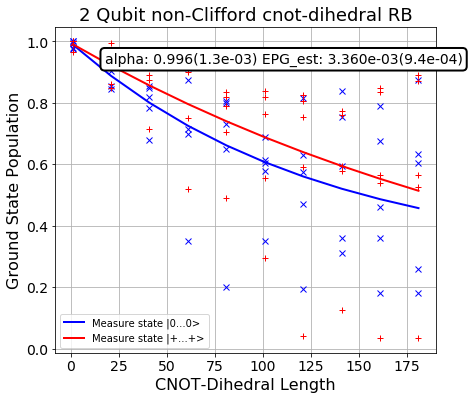

In [22]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

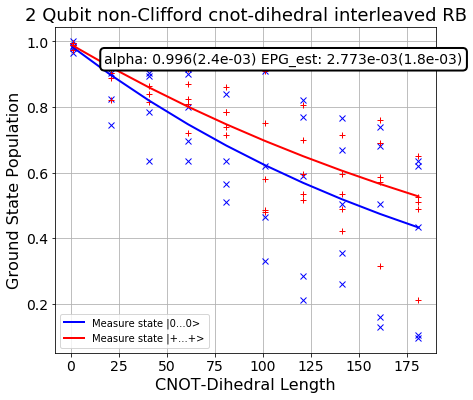

In [23]:
#Plot the joint interleaved RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_int_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()